In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


All the paths to access the models and register the results have to be change to the ones wanted by the user.

In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Opti-ML')
import os

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms, utils
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision.transforms import ToTensor

from optimizer import initialize_model

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Get models

In [ ]:
#Get all the models we want to compare
statedic_sgd=torch.load("/content/drive/MyDrive/Opti-ML/model_weights/model_sgd.pt",map_location=torch.device('cpu'))
model_sgd,inputsize = initialize_model(use_pretrained=False)
model_sgd.load_state_dict(statedic_sgd)

statedic_ada=torch.load("/content/drive/MyDrive/Opti-ML/model_weights/model_adahessian.pt",map_location=torch.device('cpu'))
model_ada,inputsize=initialize_model(use_pretrained=False)
model_ada.load_state_dict(statedic_ada)

statedic_adapretrained=torch.load("/content/drive/MyDrive/Opti-ML/model_weights/model_adahessian_pretrained.pt",map_location=torch.device('cpu'))
model_adapretrained,inputsize=initialize_model(use_pretrained=False)
model_adapretrained.load_state_dict(statedic_adapretrained)

statedic_sgdpretrained=torch.load("/content/drive/MyDrive/Opti-ML/model_weights/model_sgd_pretrained.pt",map_location=torch.device('cpu'))
model_sgdpretrained,inputsize = initialize_model(use_pretrained=False)
model_sgdpretrained.load_state_dict(statedic_sgdpretrained)

statedic_adasgd=torch.load("/content/drive/MyDrive/Opti-ML/model_weights/model_adasgd.pt",map_location=torch.device('cpu'))
model_adasgd,inputsize=initialize_model(use_pretrained=False)
model_adasgd.load_state_dict(statedic_adasgd)

statedic_sgdada=torch.load("/content/drive/MyDrive/Opti-ML/model_weights/model_sgdada.pt",map_location=torch.device('cpu'))
model_sgdada,inputsize=initialize_model(use_pretrained=False)
model_sgdada.load_state_dict(statedic_sgdada)

#Put the models we want to compare in models and their associate names
#It is supposed that all the models have the same architecture as the first one in the list

# for the first set of models
#models=[model_sgd,model_ada,model_sgdpretrained,model_adapretrained]
#names=['sgd','adahessian','sgd_pretrained','adahessian_pretrained']

#for the second set of models
models=[model_adasgd,model_sgdada,model_sgd,model_ada]
names=["adahessian_sgd","sgd_adahessian","sgd","adahessian"]

#for all the possible models
#models=[model_sgd,model_ada,model_sgdpretrained,model_adapretrained,model_adasgd,model_sgdada,model_sgd,model_ada]
#names=['sgd','adahessian','sgd_pretrained','adahessian_pretrained',"adahessian_sgd","sgd_adahessian","sgd","adahessian"]

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Two of the measure we want to consider are :
Linear CKA : (1 when A=B)
$$ 1-\frac{\|AB^T\|^2}{\|AA^T\|^2\|BB^T\|^2}$$
Orthogonal procrustes : (0 when A=B)
$$\|A\|^2+\|B\|^2-2\|AB^T\|$$

##CKA mesure
We use the https://github.com/AntixK/PyTorch-Model-Compare.git library. We can test on a lot of data quickly with this one.

In [ ]:
!pip install torch_cka #install the library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torch_cka import CKA

In [ ]:
#Create a dataloader for the testdata, all of them will be used
torch.manual_seed(20)
test_data=datasets.CIFAR10(root='data',train=False,download=True,transform=ToTensor()) #maybe need to be a bit careful with this between all our validation, test and train
testloader = DataLoader(test_data, batch_size=1000, shuffle=False)

100%|██████████| 170498071/170498071 [00:01<00:00, 102158296.22it/s]


Extracting data/cifar-10-python.tar.gz to data


### Comparison of two models

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [08:33<00:00, 51.37s/it]


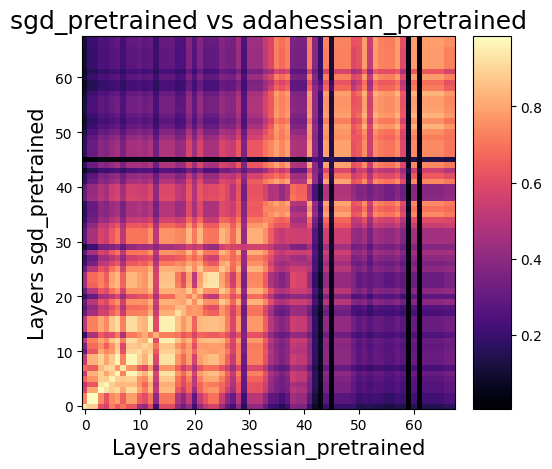

In [ ]:
#for comparison of two specific model
#index of the model to compare
ind1=3
ind2=2

cka = CKA(models[ind1], models[ind2], model1_name=names[ind1],   model2_name=names[ind2],   device='cpu')
cka.compare(testloader)
cka.plot_results(save_path="/content/drive/MyDrive/Opti-ML/graphics/CKAcomparison"+names[ind1]+"vs"+names[ind2]+".pdf")

### Comparison of all the models

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:51: UserWarning: Both model have identical names - adahessian_sgd. It may cause confusion when interpreting the results. Consider giving unique names to the models :)
  warn(f"Both model have identical names - {self.model2_info['Name']}. " \
/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [12:10<00:00, 73.02s/it]


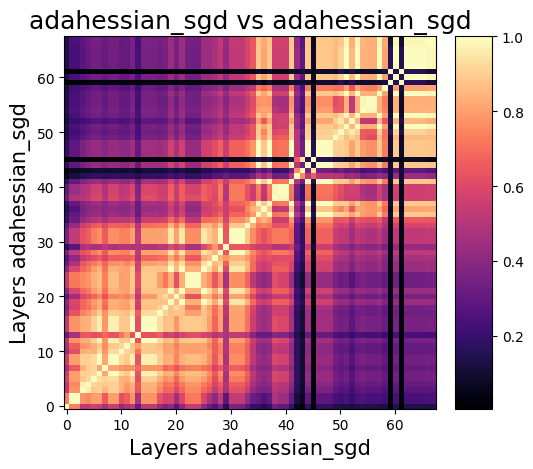

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [12:19<00:00, 73.96s/it]


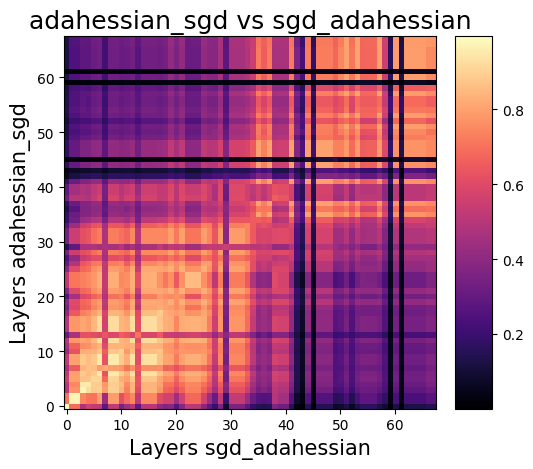

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [10:35<00:00, 63.51s/it]


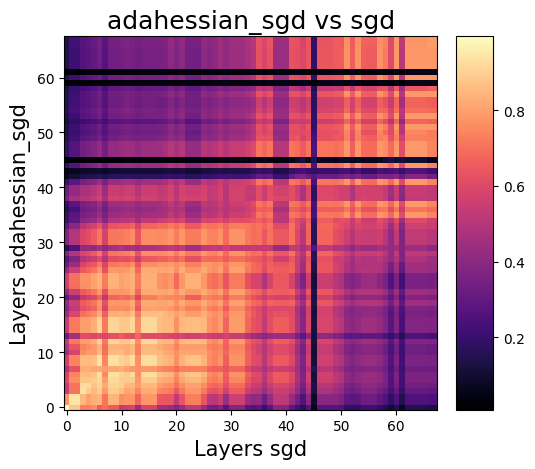

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [09:51<00:00, 59.14s/it]


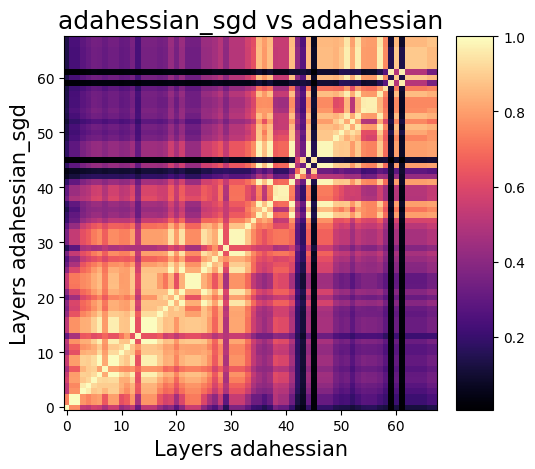

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:51: UserWarning: Both model have identical names - sgd_adahessian. It may cause confusion when interpreting the results. Consider giving unique names to the models :)
  warn(f"Both model have identical names - {self.model2_info['Name']}. " \
/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [09:51<00:00, 59.13s/it]


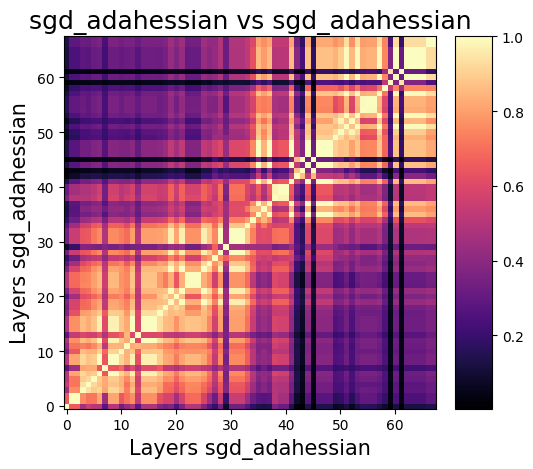

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [09:48<00:00, 58.84s/it]


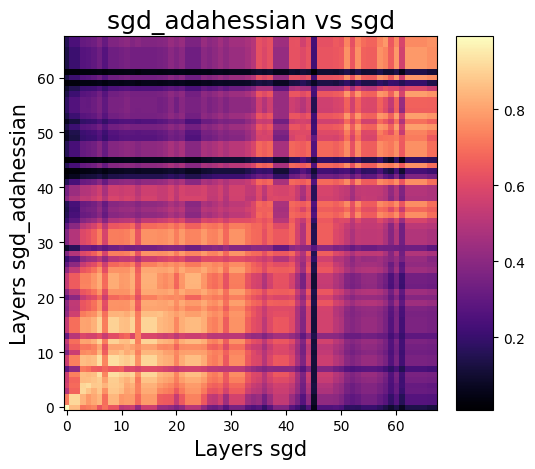

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [09:43<00:00, 58.34s/it]


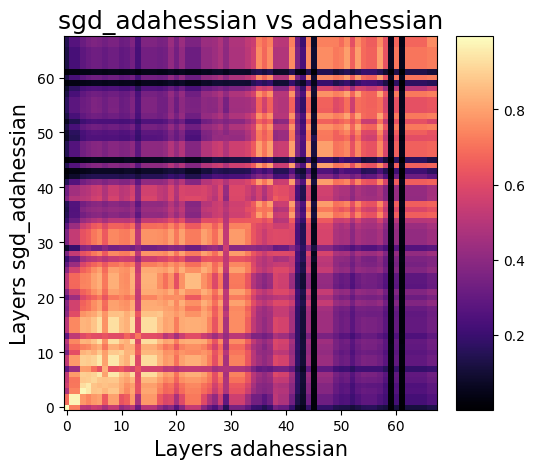

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:51: UserWarning: Both model have identical names - sgd. It may cause confusion when interpreting the results. Consider giving unique names to the models :)
  warn(f"Both model have identical names - {self.model2_info['Name']}. " \
/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [09:46<00:00, 58.63s/it]


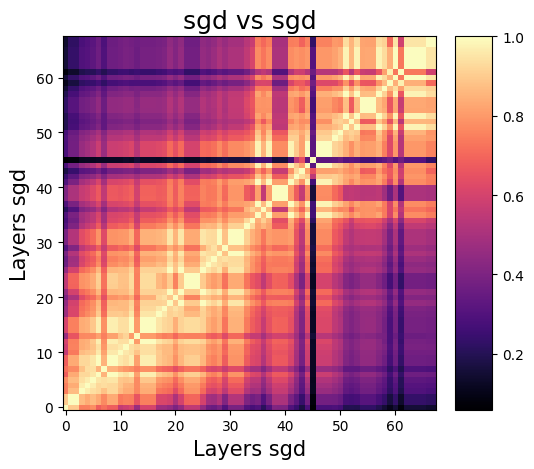

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [09:48<00:00, 58.81s/it]


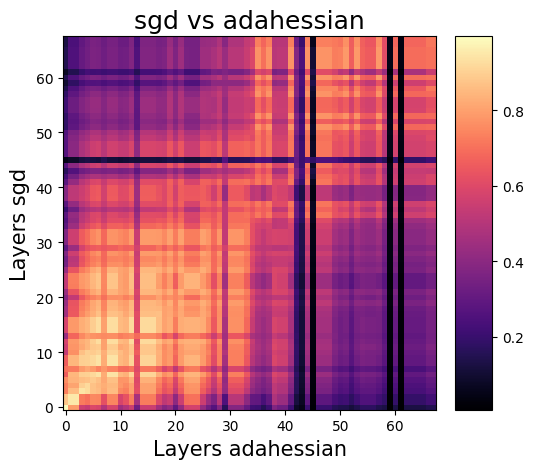

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:51: UserWarning: Both model have identical names - adahessian. It may cause confusion when interpreting the results. Consider giving unique names to the models :)
  warn(f"Both model have identical names - {self.model2_info['Name']}. " \
/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 10/10 [09:47<00:00, 58.78s/it]


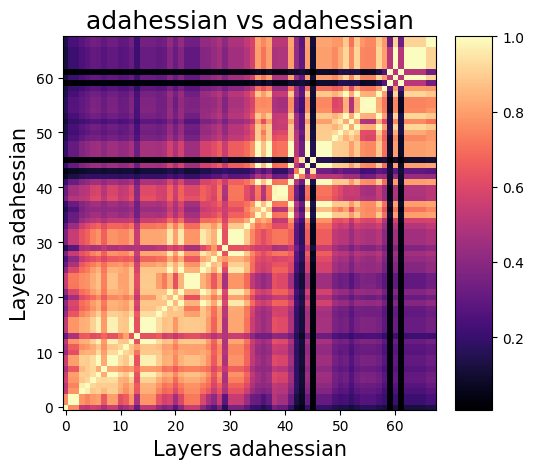

In [ ]:
for i in range(len(names)):
  for j in range(i,len(names)):
    cka = CKA(models[i], models[j], model1_name=names[i],   model2_name=names[j],   device='cpu')
    cka.compare(testloader)
    cka.plot_results(save_path="/content/drive/MyDrive/Opti-ML/graphics/CKAcomparison_"+names[i]+"vs"+names[j]+".pdf")

## CVCAA and OPD measures
We use the library https://github.com/moskomule/anatome. We can't use a lot of test data for this one and it is less optimized.

In [ ]:
!pip install -U git+https://github.com/moskomule/anatome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/moskomule/anatome to /tmp/pip-req-build-3kj41r19
  Running command git clone --filter=blob:none --quiet https://github.com/moskomule/anatome /tmp/pip-req-build-3kj41r19
  Resolved https://github.com/moskomule/anatome to commit 155ddb15e304b2285d315f4a50dbc23aeb2899cd
  Preparing metadata (setup.py) ... done
  Created wheel for anatome: filename=anatome-0.0.6-py3-none-any.whl size=10145 sha256=ca318cfa2e4b28f61c8b0cc823d5b6a04edcc98178b5484a02f843a00966789b
  Stored in directory: /tmp/pip-ephem-wheel-cache-khzkbdro/wheels/3b/f9/cb/a2306e0b7f49dcfc1b20575e726a9448bddbd3cdfd4308d632
Successfully built anatome


In [ ]:
#To have a graph similar to the one given by the first library
def add_colorbar(im, aspect=10, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

def plot_results(matrix, name1='model1',name2='model2',save_path: str = None,title: str = None):
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, origin='lower', cmap='magma')
    ax.set_xlabel(f"Layers {name1}", fontsize=15) #to modify
    ax.set_ylabel(f"Layers {name2}", fontsize=15)

    if title is not None:
        ax.set_title(f"{title}", fontsize=18)
    else:
        ax.set_title(f" {name1} vs {name2}", fontsize=18) # to modify

    add_colorbar(im)
    plt.tight_layout()

    if save_path is not None:
        plt.savefig(save_path, dpi=300)

    plt.show()

from mpl_toolkits import axes_grid1
import matplotlib.pyplot as plt


In [ ]:
#get a dataset
torch.manual_seed(20)
test_data=datasets.CIFAR10(root='data',train=False,download=True,transform=ToTensor()) #maybe need to be a bit careful with this between all our validation, test and train


100%|██████████| 170498071/170498071 [00:05<00:00, 31892646.39it/s]


Extracting data/cifar-10-python.tar.gz to data


In [ ]:
#The library don't consider the following layer block name as layer
notlayersname=['','layer1', 'layer1.0','layer1.1','layer2', 'layer2.0','layer2.1','layer3', 'layer3.0','layer3.1','layer4', 'layer4.0','layer4.1','layer2.0.downsample','layer3.0.downsample','layer3.0.downsample','layer4.0.downsample']
layersnames=[n for n, _ in models[0].named_modules() if n not in notlayersname]
print(layersnames)

['conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer3.0.conv1', 'layer3.0.bn1', 'layer3.0.relu', 'layer3.0.conv2', 'layer3.0.bn2', 'layer3.0.downsample.0', 'layer3.0.downsample.1', 'layer3.1.conv1', 'layer3.1.bn1', 'layer3.1.relu', 'layer3.1.conv2', 'layer3.1.bn2', 'layer4.0.conv1', 'layer4.0.bn1', 'layer4.0.relu', 'layer4.0.conv2', 'layer4.0.bn2', 'layer4.0.downsample.0', 'layer4.0.downsample.1', 'layer4.1.conv1', 'layer4.1.bn1', 'layer4.1.relu', 'layer4.1.conv2', 'layer4.1.bn2', 'avgpool', 'fc']


### Comparison of only two models

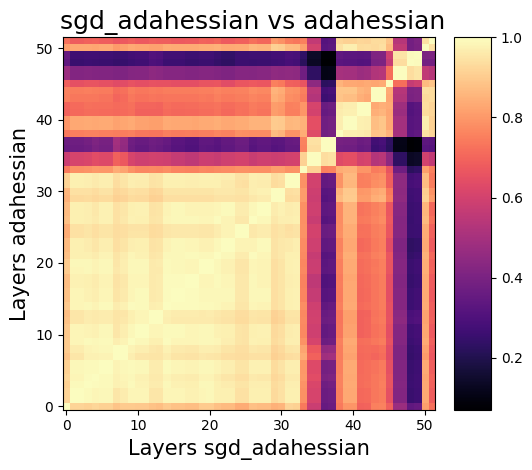

In [ ]:
#for the comparaison of two specific models
#models to test and methods:
ind1=1
ind2=3
meth='opd' # or cvcca

from anatome import Distance

testloader = DataLoader(test_data, batch_size=20, shuffle=False) #we can't take a batch_size too big or it doesn't run, we test on the same data for all models

distance = Distance(models[ind1], models[ind2], method=meth)
with torch.no_grad():
    data=next(iter(testloader))[0]
    distance.forward(data)

#compute comparison for all pair of layers
all_comparison=np.zeros([len(layersnames),len(layersnames)])
for k,layer1 in enumerate(layersnames):
  for l,layer2 in enumerate(layersnames):
    all_comparison[k,l]=distance.between(layer1,layer2)

#we do 1-res to have the same convention as for cka of 1 is similar and 0 is not
plot_results(np.ones_like(all_comparison)-all_comparison,names[ind1],names[ind2],"/content/drive/MyDrive/Opti-ML/graphics/OPDcomparison_"+names[ind1]+"vs"+names[ind2]+".pdf")

### Comparison of all the models

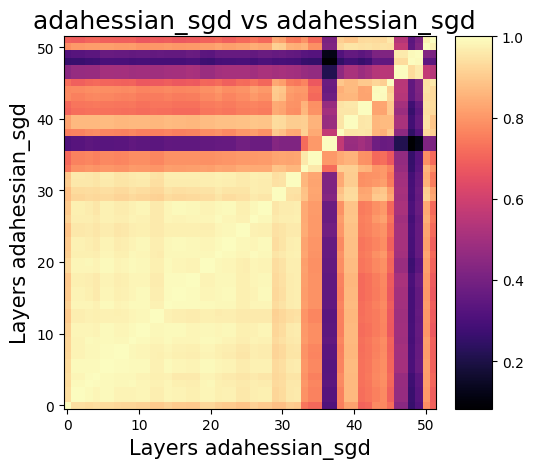

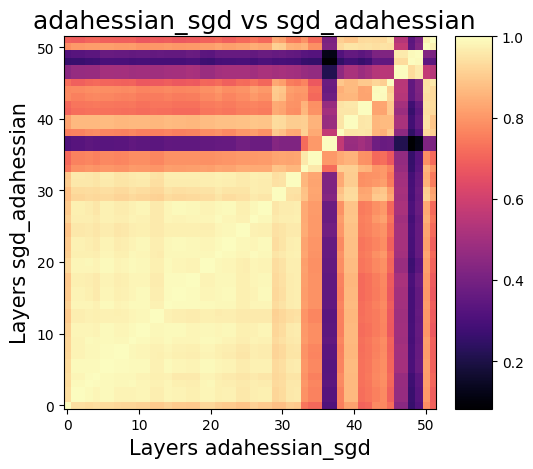

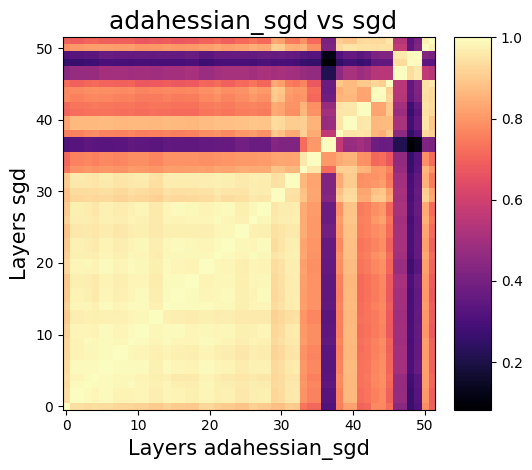

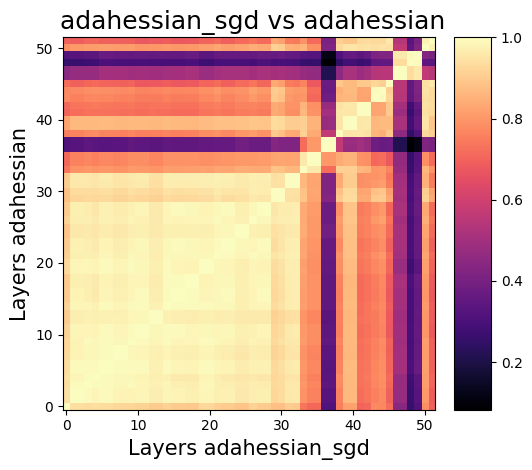

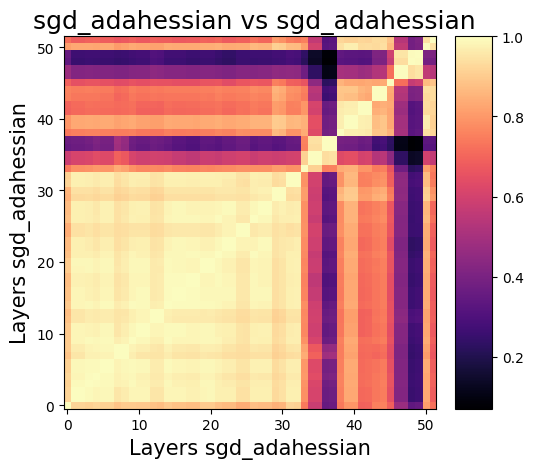

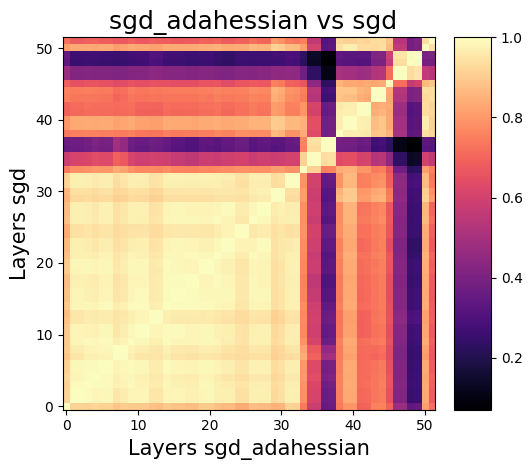

In [ ]:
#for the opd distance
from anatome import Distance
for i in range(len(names)):
  for j in range(i,len(names)):

    testloader = DataLoader(test_data, batch_size=20, shuffle=False) #we can't take a batch_size too big or it doesn't run, we try to test on the same data for all models
    distance = Distance(models[i], models[j], method='opd')
    with torch.no_grad():
        data=next(iter(testloader))[0]
        distance.forward(data)

  #compute comparison for all pair of layers
    all_comparison=np.zeros([len(layersnames),len(layersnames)])
    for k,layer1 in enumerate(layersnames):
      for l,layer2 in enumerate(layersnames):
        all_comparison[k,l]=distance.between(layer1,layer2)

    #we do 1-res to have the same convention as for cka of 1 is similar and 0 is not
    plot_results(np.ones_like(all_comparison)-all_comparison,names[i],names[j],"/content/drive/MyDrive/Opti-ML/graphics/OPDcomparison_"+names[i]+"vs"+names[j]+".pdf")

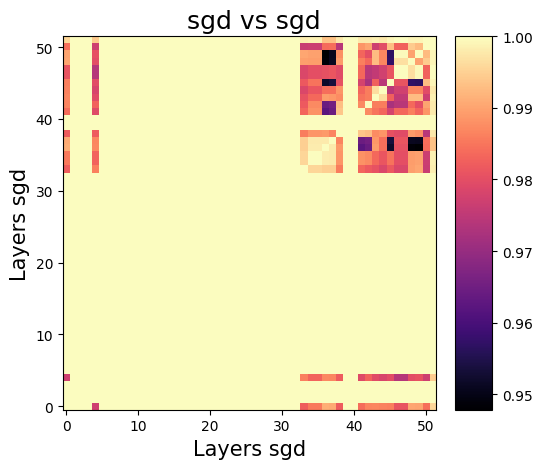

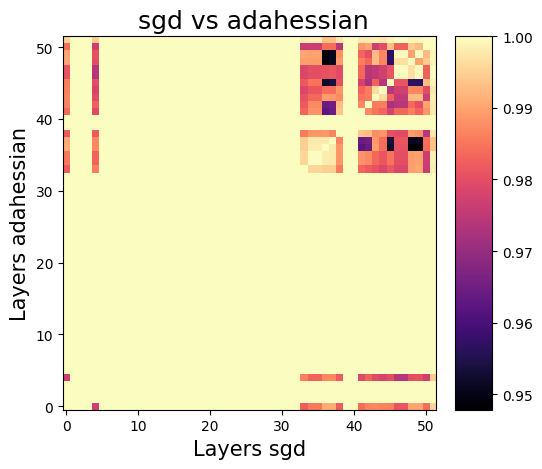

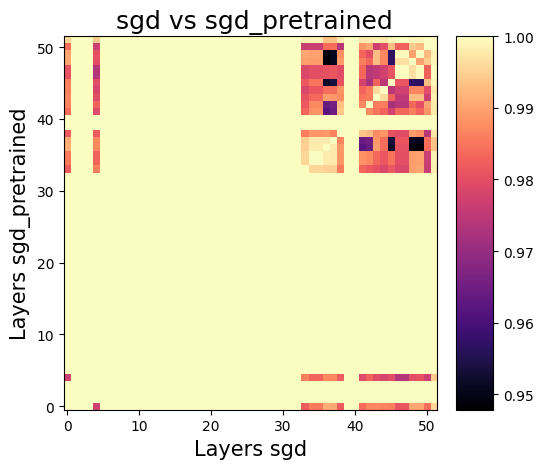

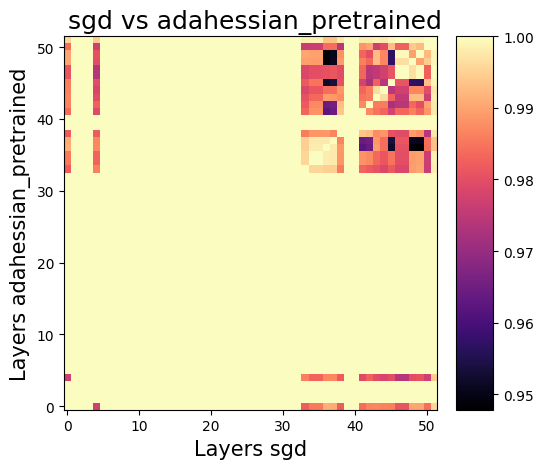

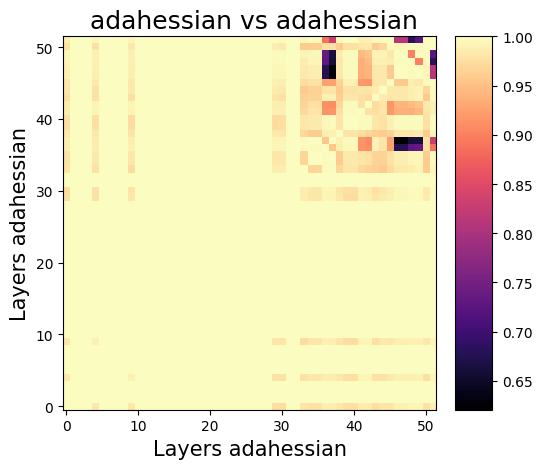

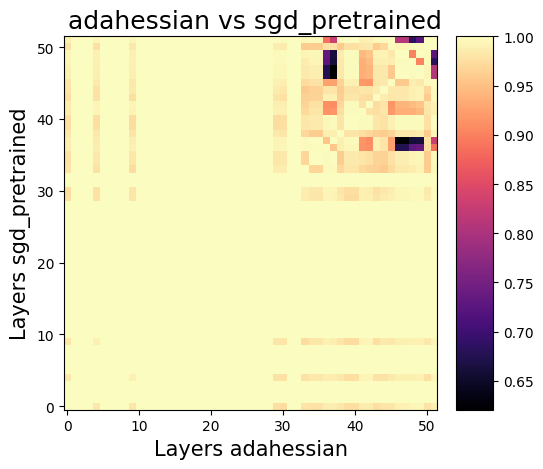

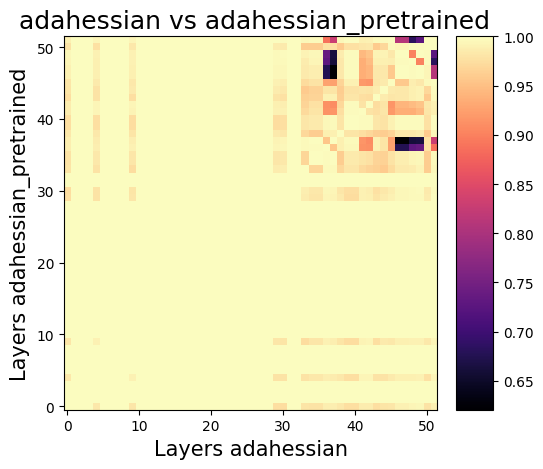

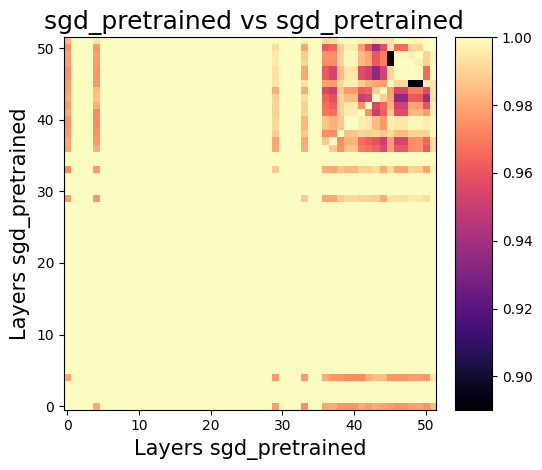

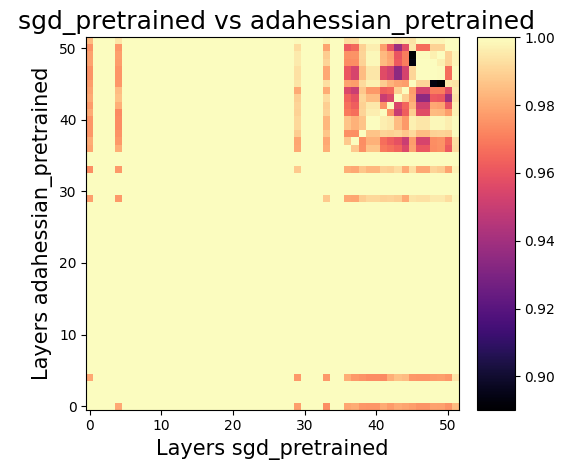

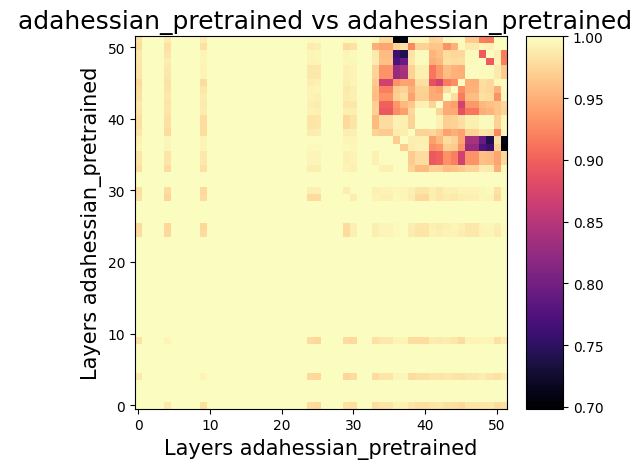

In [ ]:
#for the cvcaa distance
from anatome import Distance
for i in range(len(names)):
  for j in range(i,len(names)):
    testloader = DataLoader(test_data, batch_size=20, shuffle=False) #we can't take a batch_size too big or it doesn't run, we try to test on the same data for all models
    distance = Distance(models[i], models[j], method='svcca')
    with torch.no_grad():
        data=next(iter(testloader))[0]
        distance.forward(data)

    #compute comparison for all pair of layers
    all_comparison=np.zeros([len(layersnames),len(layersnames)])
    for k,layer1 in enumerate(layersnames):
      for l,layer2 in enumerate(layersnames):
        all_comparison[k,l]=distance.between(layer1,layer2)

    plot_results(np.ones_like(all_comparison)-all_comparison,names[i],names[j],"/content/drive/MyDrive/Opti-ML/graphics/SVCCAcomparison_"+names[i]+"vs"+names[j]+".pdf")